# Исследование объявлений о продаже квартир

- По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

- План работ 
1. Изучить первичные данные.
2. обработать данные. Найти пропущенные значения и выбросы. Удалить или исправить, если такая возможность есть и не пострадают данные.
3. добавить столбцы которые помогут в иследовании  такие как, цена за один квадратный метр, день недели публикации, месяц публикации, год публикации, тип этажа квартиры, растояние до центра городв в км.
4. изучить следующие параметры
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего парка
5. Изучить, как быстро продавались квартиры
6. Изучить, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
7. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построить сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
8. вычислить их среднюю стоимость квартир на разном удалении от центра. Учитывая каждый километр расстояния: узнать среднюю цену квартир в одном километре от центра, в двух и так далее. Опишу, как стоимость объектов зависит от расстояния до центра города — построю график изменения средней цены для каждого километра от центра Петербурга
9. сделать выводы.

## Открою файл с данными и изучу общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"C:\Users\SubKi\Downloads\data_sets\real_estate_data.csv", sep="\t")
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- 'cityCenters_nearest' буду переименовывать по стандарту

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- В столбцах 'is apartment', 'first_day_exposition' указан не правильный тип данных

### Гистограммы по датафрейму до обработки 

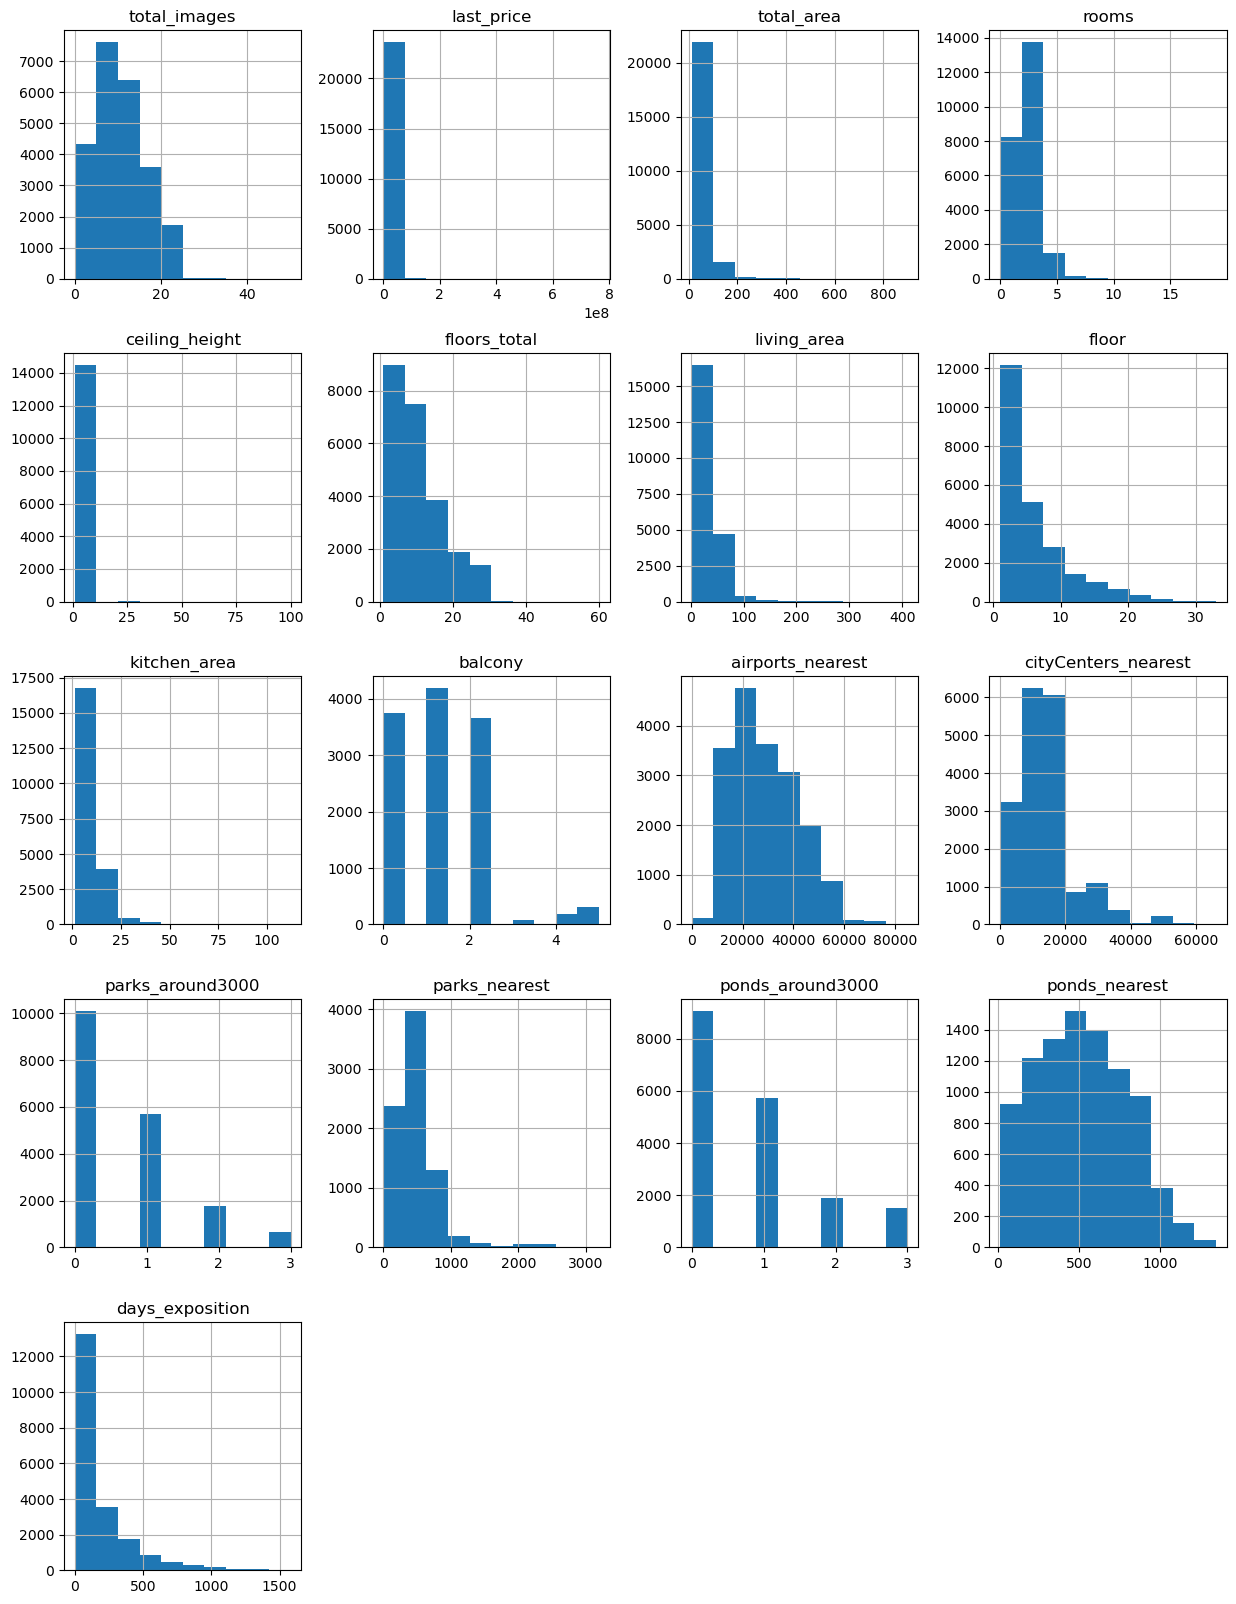

In [3]:
df.hist(figsize=(15, 20))
plt.show()

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
check_df = df.shape[0]

- По полученным гистограммам могу сделать следующие выводы: 
'last_price' требует дополнительных исследований. 
'total_area' требуется устранить выбросы. 
'living_area' требуется устранить выбросы. 
'ceiling_height' есть выбросы, мало кто может позволить себе 100 м потолки. ) 
'park_nearest' и ponds_nearest очень много пропущенных значений. 

- В столбцах много пропущенных значений, больше всего в 'is_apartment ', 'parks_nearest', 'ponds_nearest'.

## Предобработка данных

###  обработка столбца 'ceiling_height' 

In [6]:
df['ceiling_height'].isna().sum()

9195

In [7]:
df['ceiling_height'].mean()

2.77149889685604

In [8]:
df['ceiling_height'].median()

2.65

<Axes: >

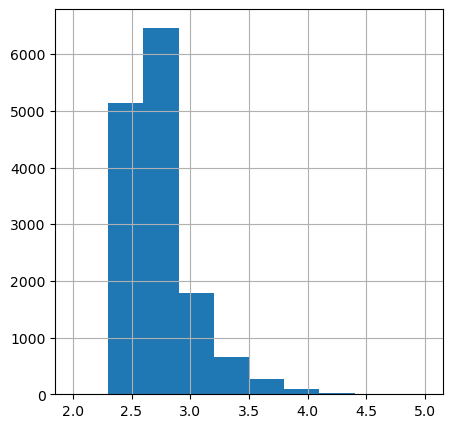

In [9]:
df['ceiling_height'].hist(bins= 10, figsize=(5, 5), range=(2, 5))

In [10]:
df.query('3.5 <= ceiling_height <= 4' )['ceiling_height'].count()

359

In [11]:
df.query('ceiling_height >= 4' )['ceiling_height'].count()

114

In [12]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 

In [13]:
df['ceiling_height'].isna().sum()

0

- Средняя высота потолков 2.77м, а медианная 2.65м. Квартир с потолками от 3.5м до 4х метров 359, , больше 4х метров 114 штук, в основном это редкие выбросы. По гистограмме видно что основное количество потолков имеют высоту от 2.5м до 3.5м. в пропущенные значения установлю медианные значения потолков. Пропущеные значения вероятнее всего не были внесенны из за человеческого фактора, возможно в квартире потолки были не везде одинаковый высоты и не смогли решить какую записать.

###  Обработка столбца 'living_area' 


In [14]:
df['living_area'].isna().sum()

1903

In [15]:
df['living_area'].mean()

34.457852427601395

In [16]:
df['living_area'].median()

30.0

In [17]:
df.query('living_area >= 100' )['living_area'].count()

363

<Axes: >

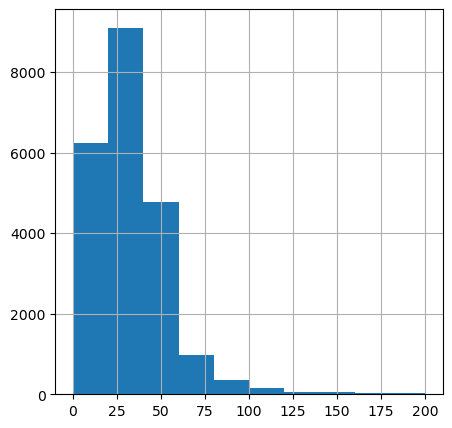

In [18]:
df['living_area'].hist(bins=10, figsize=(5, 5), range = (0,200))

In [19]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median()) 

In [20]:
df.query('living_area >= 125')['living_area'].count()

199

- В пропущенных строчках установлю медианные значения которые не сильно отличаются от средних.

###  обработка столбца 'kitchen_area' 

In [21]:
df['kitchen_area'].isna().sum()

2278

In [22]:
df['kitchen_area'].mean()

10.569807198543485

In [23]:
df['kitchen_area'].median()

9.1

<Axes: >

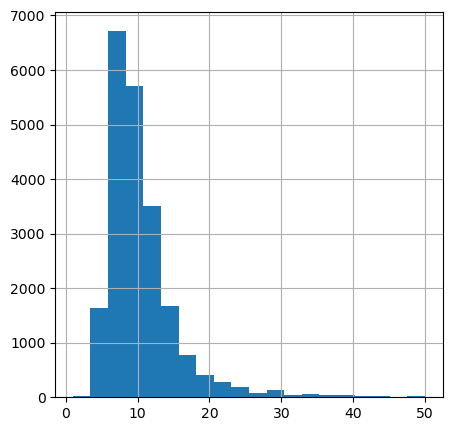

In [24]:
df['kitchen_area'].hist(bins = 20, figsize=(5, 5),range= (1,50))

In [25]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median()) 

In [26]:
df.query('kitchen_area >= 50')['kitchen_area'].count()

58

In [27]:
df = df.query('kitchen_area <= 50')

- В пропущенных строчках установлю медианные значения которые не сильно отличаются от средних, обьектов с площадью кухни больше 50 квадратных метров буду считать выбросами.

###  обработка столбца 'floors_total' 

In [28]:
df['floors_total'].isna().sum()

86

In [29]:
df['floors_total'].mean()

10.680358127890695

In [30]:
df['floors_total'].median()

9.0

<Axes: >

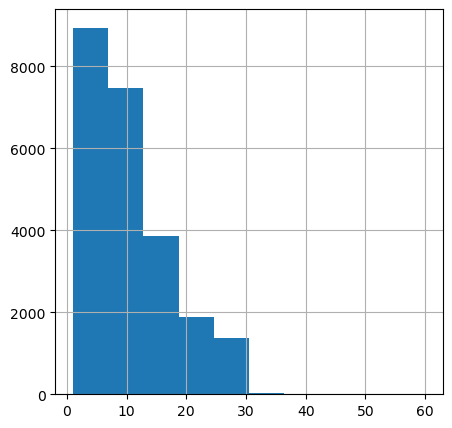

In [31]:
df['floors_total'].hist(bins= 10, figsize=(5, 5))

In [32]:
df['floors_total'] = df['floors_total'].dropna()

- Удалил пропуски, так как их малое количество не повлияет на дальнейшее исследование.


In [33]:
df['floors_total'].max()

60.0

- В пропущенных строчках установлю медианные значения которые не сильно отличаются от средних, данные не были внесенны из за человеческого фактора.

###  обработка столбца 'is_apartment' 

In [34]:
df['is_apartment'].isna().sum()

20883

In [35]:
def bool_apartment(is_apartment):
    return bool(is_apartment)
df['is_apartment']= df['is_apartment'].apply(bool_apartment)

In [36]:
df['is_apartment'].isna().sum()

0

- После перевода из объекта в булев тип пропущенные значения пропали.

###  обработка столбца 'balcony' 

In [37]:
df['balcony'].isna().sum()

11495

In [38]:
df['balcony'].value_counts()

balcony
1.0    4189
0.0    3751
2.0    3653
5.0     304
4.0     180
3.0      81
Name: count, dtype: int64

In [39]:
df['balcony'].median()

1.0

<Axes: >

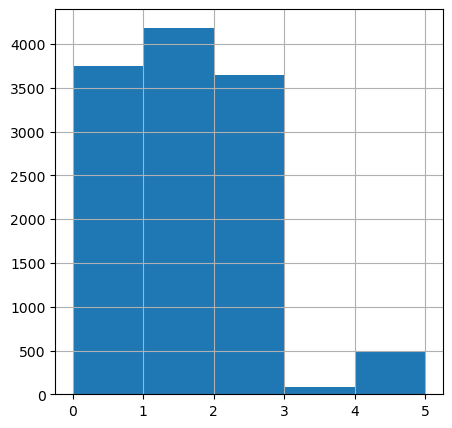

In [40]:
df['balcony'].hist(bins= 5, figsize=(5, 5))

In [41]:
df['balcony'] = df['balcony'].fillna(0)

- Больше 3х балконов встечаются редко. Много пропущенных значений, наиболее вероятно что балконов нет и поэтому их не указали. Заменю пропущенные значения на 0.

###  обработка столбца 'locality_name' 

In [42]:
df['locality_name'].isna().sum()

49

In [43]:
df.duplicated().sum()

0

In [44]:
df['locality_name'].nunique()

364

In [45]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [46]:
def replace_wrong_values(wrong_values, correct_value): 
    for wrong_value in wrong_values: 
        df['locality_name'] =  df['locality_name'].str.replace(wrong_value, correct_value) 

duplicates = ['поселок городского типа', 'городской поселок', 'поселок станции', 'коттеджный поселок', 'поселок при железнодорожной станции']
location = 'поселок' 
replace_wrong_values(duplicates, location) 

In [47]:
df['locality_name'].nunique()

318

In [48]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [49]:
def last_word_in_name(locality_name):
    locality_name = str(locality_name).split(" ")[-1]
    return locality_name

df['locality_name_last_word'] = df['locality_name'].apply(last_word_in_name)
df.groupby('locality_name_last_word').agg({'locality_name': 'nunique'}).query('locality_name > 1')

,locality_name
locality_name_last_word,
Бегуницы,2
Бор,6
Гарболово,2
Горка,2
Зимитицы,2
Калитино,2
Колпаны,2
Кудрово,2
Ладога,2


In [50]:
df['locality_name'] = df['locality_name'].dropna()

- Удалил пропуски, так как их малое количество не повлияет на дальнейшее исследование.


- Устранил неявные дубликаты, заменив ё на е, также написал функцию, которая делает названия одного и того же типа объекта, написанные разным способом, одинаковыми. Написал функцию, которая по последнему слову определяла одинаковые названия, но с учётом того, что таким образом ища названия, можно два разных объекта записать в один. К примеру, село или деревня с одним названием могут быть двумя разными объектами. 

###  обработка столбца  'airports_nearest '

In [51]:
df['airports_nearest'].isna().sum()

5541

In [52]:
df['airports_nearest'].median()

26737.0

In [53]:
df['airports_nearest'].mean()

28796.233657243818

<Axes: >

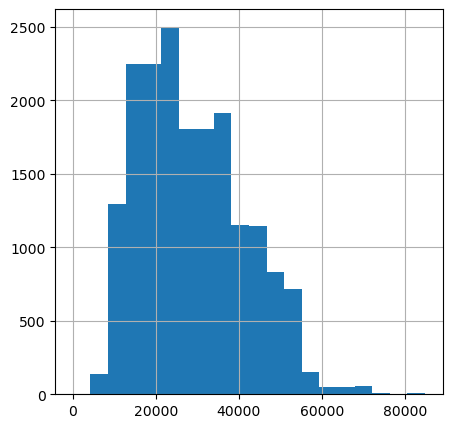

In [54]:
df['airports_nearest'].hist(bins= 20, figsize=(5, 5))

- Значения были пропущены, вероятно, в следствии технической ошибки, в программе, возможно, отсутствовали координаты, и она не смогла рассчитать расстояние между объектами. Если удалять, то будет потеряно много данных, а если ставить 0, то будет маловероятно, что такое количество зданий будет вблизи аэропорта. Адекватной альтернативы нет на замену оставлю как есть.

###  обработка столбца  'cityCenters_nearest'

In [55]:
df = df.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'})

In [56]:
df['city_сenters_nearest'].isna().sum()

5518

In [57]:
df['city_сenters_nearest'].median()

13107.0

In [58]:
df['city_сenters_nearest']= df['city_сenters_nearest'].fillna(df['city_сenters_nearest'].median())

<Axes: >

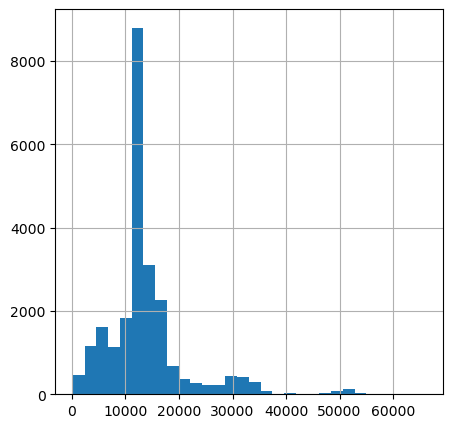

In [59]:
df['city_сenters_nearest'].hist(bins= 30, figsize=(5, 5))

- Значения были пропущенны вероятно в следствии технической ошибки, в программе возможно отсутствовали координаты и она не смогла расчитать расстояние между обьектами. В пропущенных строках установил медианные значения. Если удалять, то будет потеряно много данных, а если ставить 0, то будет мало вероятно что такое количество зданий будет в центре города. Поэтому использую медиану в пропущенных значениях.

###  обработка столбца  'parks_around3000'

In [60]:
df['parks_around3000'].isna().sum()

5517

In [61]:
df['parks_around3000'].value_counts()

parks_around3000
0.0    10091
1.0     5666
2.0     1735
3.0      644
Name: count, dtype: int64

In [62]:
df['parks_around3000']= df['parks_around3000'].fillna(0)

<Axes: >

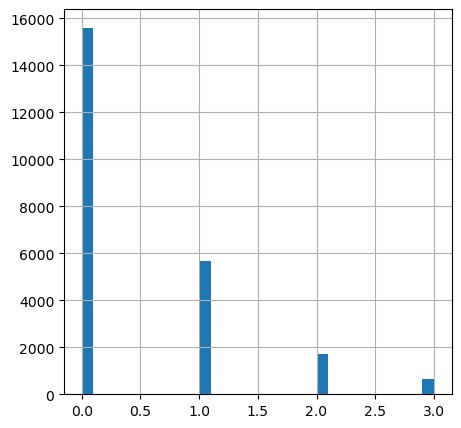

In [63]:
df['parks_around3000'].hist(bins= 30, figsize=(5, 5))

- Выбросы отсутствуют, пропущенные строчки в столбце технического характера, возможно отсутствие необходимых для расчёта координат указанных точек или разные названия одного и того же пункта. Пропущенные строчки поставил 0, так как вероятнее, что в пределах 3 км. может не быть парка рядом с домом.

###  обработка столбца 'ponds_around3000'

In [64]:
df['ponds_around3000'].isna().sum()

5517

In [65]:
df['ponds_around3000'].value_counts()

ponds_around3000
0.0    9055
1.0    5708
2.0    1885
3.0    1488
Name: count, dtype: int64

In [66]:
df['ponds_around3000']= df['ponds_around3000'].fillna(0)

<Axes: >

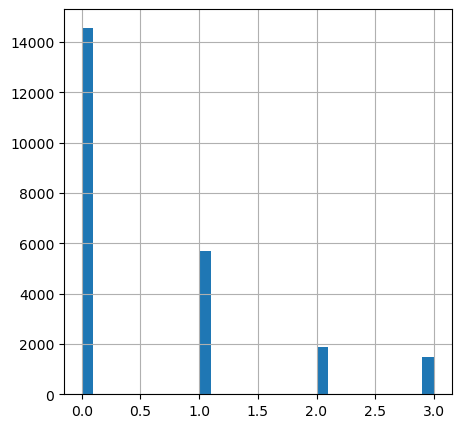

In [67]:
df['ponds_around3000'].hist(bins= 30, figsize=(5, 5))

- Выбросы отсутствуют, пропущенные строчки в столбце технического характера, возможно отсутсвие необходимых для расчёта координат указанных точек или разные названия одного и того же пункта. Пропущенные строчки поставил 0 так как вероятнее что в предлах 3х км. может не быть пруда рядом с домом. Адекватной альтернативы нет на замену оставлю как есть.

###  обработка столбцов parks_nearest и ponds_nearest

In [68]:
df['parks_nearest'].isna().sum()

15604

In [69]:
df['parks_nearest'].median()

455.0

In [70]:
df['ponds_nearest'].isna().sum()

14572

In [71]:
df['ponds_nearest'].median()

503.0

array([[<Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_nearest'}>]], dtype=object)

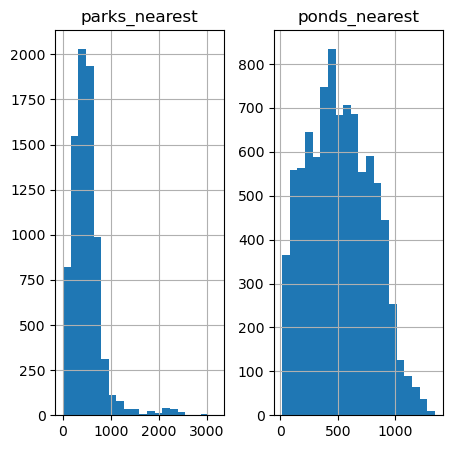

In [72]:
df[['parks_nearest','ponds_nearest']].hist(bins= 20, figsize=(5, 5))

- Очень много пропущеннных данных в этих столбцах, для того чтобы не размывать среднее, также не вижу других альтернатив для замены. Пропуски решил не изменять так как будет сильный перекос. Скорее всего пропущенные значения это те, где пруды и парки находятся дальше 3000 м. Но если удалть строки то будет катастрофически много потерянных данных.  Адекватной альтернативы нет на замену оставлю как есть.

###  обработка столбца 'days_exposition'

In [73]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [74]:
df['days_exposition'].isna().sum()

3173

In [75]:
df['days_exposition'].mean()

180.715380859375

In [76]:
df['days_exposition'].median()

95.0

<Axes: >

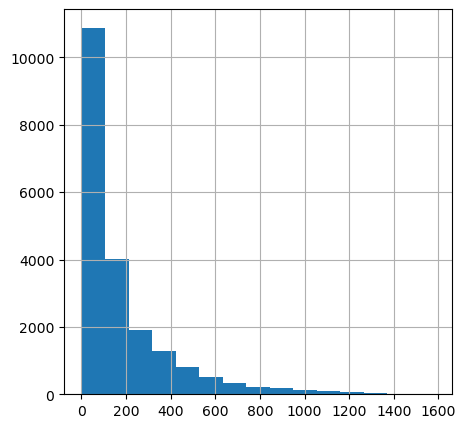

In [77]:
df['days_exposition'].hist(bins= 15, figsize=(5, 5))

In [78]:
df[df['days_exposition'].isna()]['first_day_exposition'].value_counts().head(50)

first_day_exposition
2019-04-22    46
2019-04-18    44
2019-04-29    36
2019-04-08    36
2019-04-26    35
2019-04-17    35
2019-04-04    35
2019-04-15    34
2019-04-16    32
2019-04-24    32
2019-04-09    31
2019-04-01    30
2019-04-23    30
2019-03-13    29
2019-05-01    29
2019-04-05    29
2019-04-11    29
2019-03-19    28
2019-04-02    28
2019-02-12    28
2019-03-18    28
2019-03-15    28
2019-04-12    27
2019-03-29    27
2019-04-25    26
2019-04-30    25
2019-03-14    24
2019-03-21    23
2019-02-26    23
2019-03-26    22
2019-04-03    22
2019-03-22    22
2019-03-05    21
2019-02-21    21
2019-03-04    21
2019-04-06    20
2019-05-03    20
2019-03-06    20
2019-03-25    20
2019-03-28    19
2019-03-12    19
2019-02-27    19
2019-04-28    18
2019-04-10    18
2019-04-19    18
2019-02-25    17
2019-03-11    16
2019-03-27    16
2019-04-14    16
2019-04-20    16
Name: count, dtype: int64

In [79]:
percentage = round((df['days_exposition'].isna().sum() / 23699) * 100, 2)
print('если убрать пропуски колонки days_exposition будет', percentage,'% от всех данных, что будет слишком много, поэтому осатвлю пропуски')

если убрать пропуски колонки days_exposition будет 13.39 % от всех данных, что будет слишком много, поэтому осатвлю пропуски


- С марта по апрель 2019 года было больше всего пропусков, это не похоже на случайные пропуски. Возможно было событие которое их вызволо.
    если убрать пропуски колонки days_exposition, будет 13.25 % от всех данных, это слишком много, поэтому осатвлю пропуски.

In [80]:
# код ревьюера
import datetime as dt

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_year'] = df['first_day_exposition'].dt.year
df[df['days_exposition'].isnull()].pivot_table(columns = 'first_day_year', values = 'total_area', aggfunc = 'count')

first_day_year,2014,2015,2016,2017,2018,2019
total_area,18,69,67,270,956,1793


In [81]:
df['first_day_exposition'].max()-df['first_day_exposition'].min()

Timedelta('1618 days 00:00:00')

In [82]:
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

- Изменил тип столбца - для того чтобы пандас мог точно определять даты. Устранил пропущенные данные в строчке, установив медианное значение. Пропущенные значения могут быть как в связи человеческой ошибки, так и технической ошибкой.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23653 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23653 non-null  int64         
 1   last_price               23653 non-null  float64       
 2   total_area               23653 non-null  float64       
 3   first_day_exposition     23653 non-null  datetime64[ns]
 4   rooms                    23653 non-null  int64         
 5   ceiling_height           23653 non-null  float64       
 6   floors_total             23567 non-null  float64       
 7   living_area              23653 non-null  float64       
 8   floor                    23653 non-null  int64         
 9   is_apartment             23653 non-null  bool          
 10  studio                   23653 non-null  bool          
 11  open_plan                23653 non-null  bool          
 12  kitchen_area             23653 non-nu

In [84]:
df.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                  86
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                 49
airports_nearest            5541
city_сenters_nearest           0
parks_around3000               0
parks_nearest              15604
ponds_around3000               0
ponds_nearest              14572
days_exposition             3173
locality_name_last_word        0
first_day_year                 0
dtype: int64

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'city_сenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>,
        <Axes: title={'center': 'first_day_year'}>, <Axes: >]],
      dtype=object)

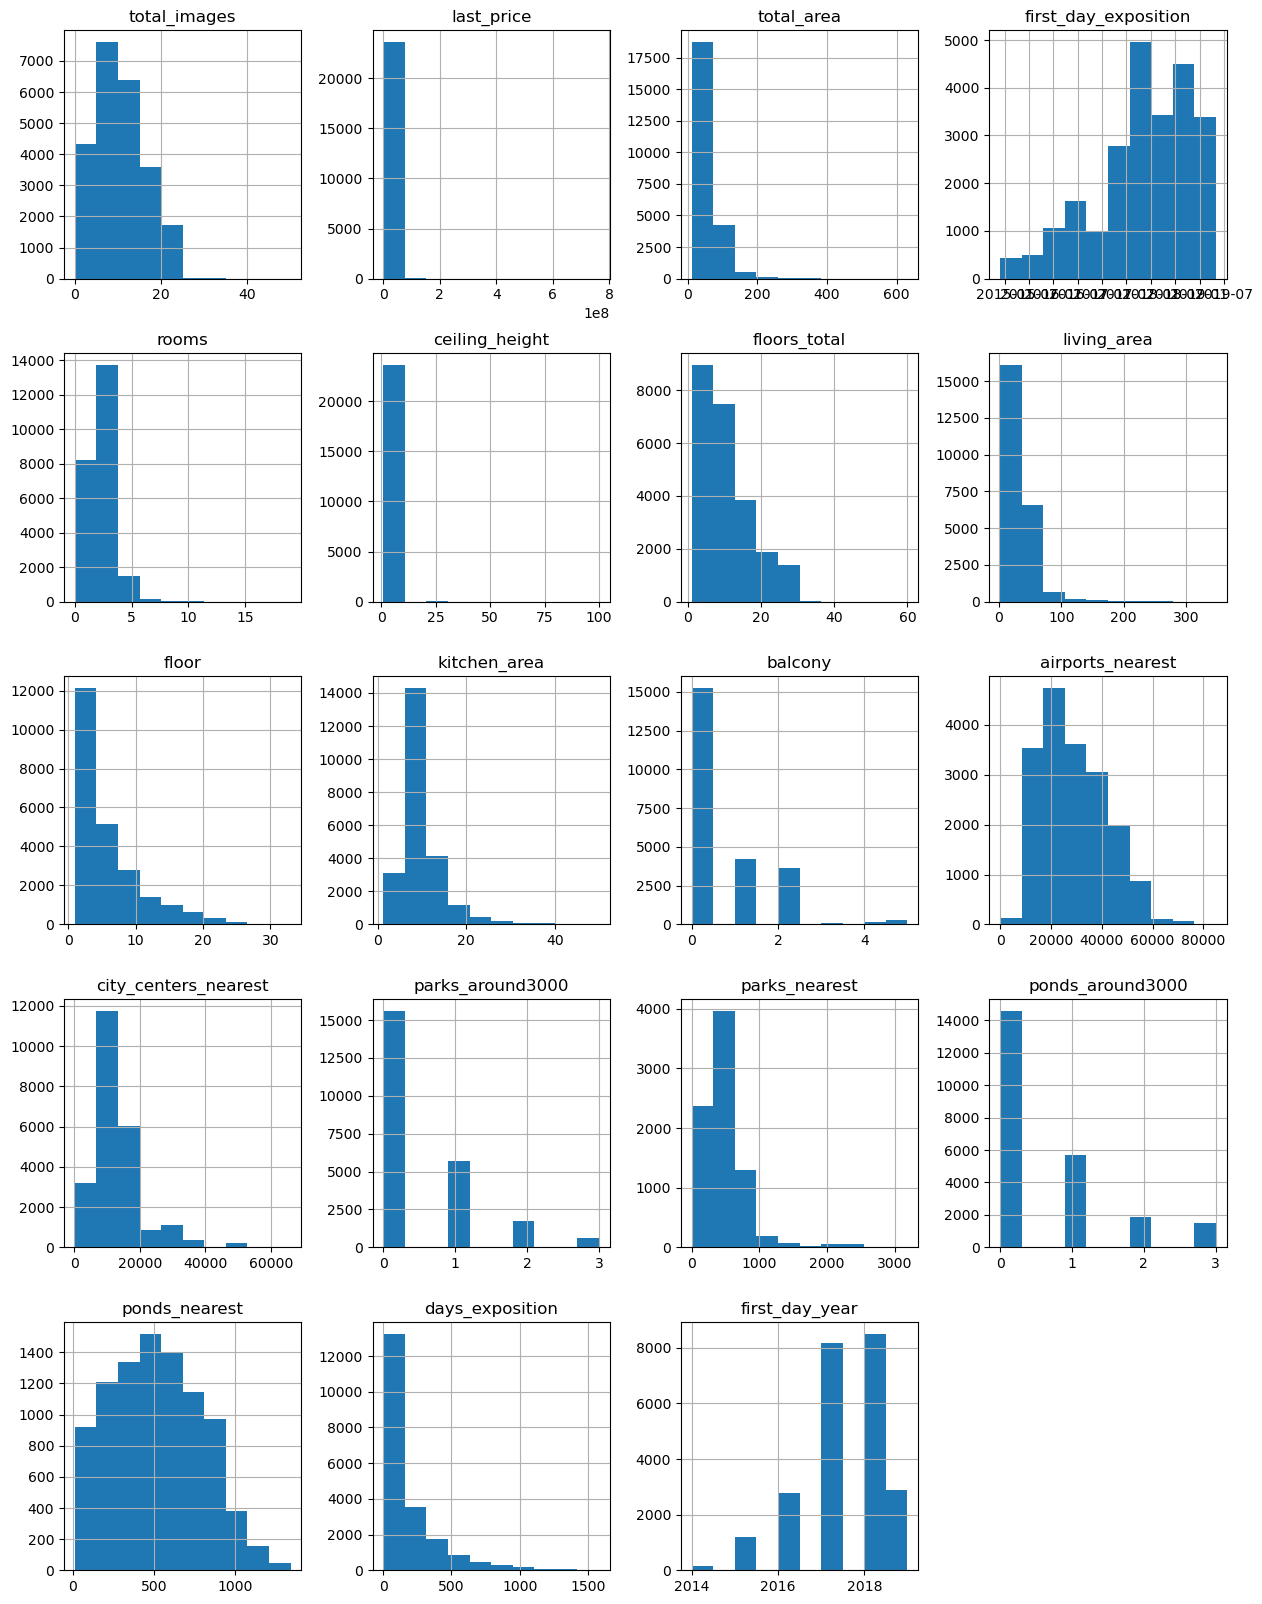

In [85]:
df.hist(figsize=(15, 20))

- Пропущенные значения и выбросы устранены. По гистограмам можно увидеть, что данные приближенны к расспределению Пуассона или к колоколу нормальности.

## Добавлю в таблицу новые столбцы

###  Цена одного квадратного метра

In [86]:
df['price_per_square_meter '] = (df['last_price'] / df['total_area']).round(2)

In [87]:
df['price_per_square_meter '].head(10)

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
5     95065.79
6     99195.71
7    110544.69
8     87454.76
9     88524.59
Name: price_per_square_meter , dtype: float64

- создал с столбец с ценой одного квадратного метра

In [88]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'locality_name_last_word',
       'first_day_year', 'price_per_square_meter '],
      dtype='object')

### день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [89]:
df['day_of_the_week'] = df['first_day_exposition'].dt.weekday

In [90]:
df['day_of_the_week'].head()

0    3
1    1
2    3
3    4
4    1
Name: day_of_the_week, dtype: int32

### месяц публикации объявления

In [91]:
df['month_of_publication'] = df['first_day_exposition'].dt.month

In [92]:
df['month_of_publication'].head()

0     3
1    12
2     8
3     7
4     6
Name: month_of_publication, dtype: int32

### год публикации объявления

In [93]:
df['year_of_publication'] = df['first_day_exposition'].dt.year

In [94]:
df['year_of_publication'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_of_publication, dtype: int32

### тип этажа квартиры

In [95]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [96]:
def type_of_floors(df):


    if df['floor'] == 1:
        return 'первый'

    if df['floor'] == df['floors_total']:
            return 'последний'

    return 'другие'

    

df['type_of_floors'] = df.apply(type_of_floors, axis=1)

In [97]:
df['type_of_floors'].unique()

array(['другие', 'первый', 'последний'], dtype=object)

In [98]:
df[['floor','floors_total','type_of_floors']].head(20)

,floor,floors_total,type_of_floors
0,8,16.0,другие
1,1,11.0,первый
2,4,5.0,другие
3,9,14.0,другие
4,13,14.0,другие
5,5,12.0,другие
6,6,26.0,другие
7,22,24.0,другие
8,26,27.0,другие
9,7,9.0,другие


### расстояние до центра города в километрах.

In [99]:
df['city_сenters_nearest_km'] = (df['city_сenters_nearest'] / 1000).round()

In [100]:
df['city_сenters_nearest_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_сenters_nearest_km, dtype: float64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23653 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23653 non-null  int64         
 1   last_price               23653 non-null  float64       
 2   total_area               23653 non-null  float64       
 3   first_day_exposition     23653 non-null  datetime64[ns]
 4   rooms                    23653 non-null  int64         
 5   ceiling_height           23653 non-null  float64       
 6   floors_total             23567 non-null  float64       
 7   living_area              23653 non-null  float64       
 8   floor                    23653 non-null  int64         
 9   is_apartment             23653 non-null  bool          
 10  studio                   23653 non-null  bool          
 11  open_plan                23653 non-null  bool          
 12  kitchen_area             23653 non-nu

- Созданны столбцы с данными которые помогут в дальнеших иследованиях.

## Проведу исследовательский анализ данных

### как быстро продавались квартиры

<Axes: >

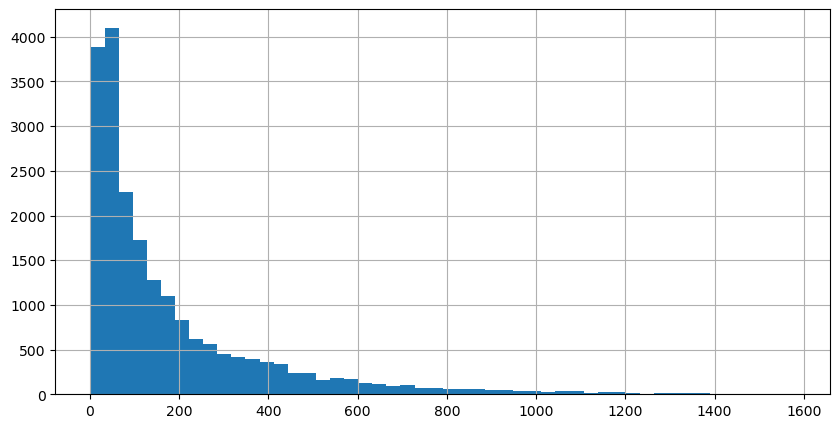

In [102]:
df['days_exposition'].hist(bins= 50, figsize=(10, 5))

In [103]:
df['days_exposition'].max()

1580.0

<Axes: >

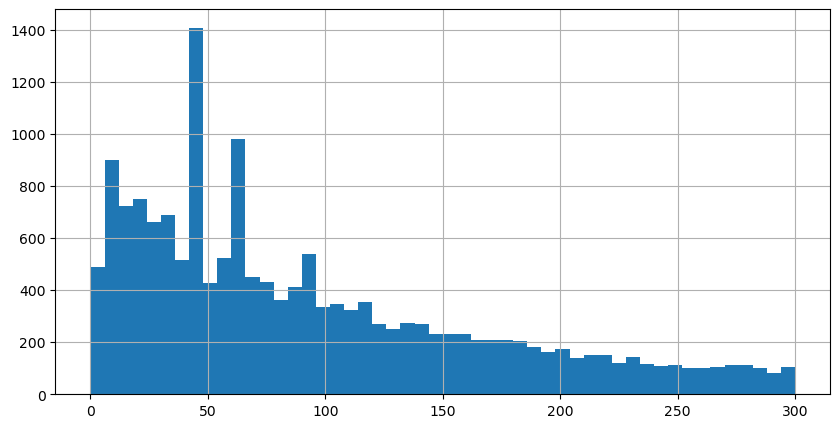

In [104]:
df['days_exposition'].hist(bins= 50, figsize=(10, 5), range= (0, 300))

<Axes: >

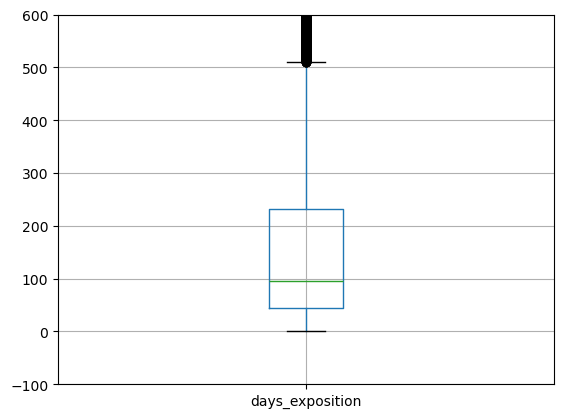

In [105]:
plt.ylim(-100, 600)
df.boxplot(column= 'days_exposition')

In [106]:
df['days_exposition'].mean()

180.715380859375

In [107]:
df['days_exposition'].median()

95.0

- Около 100 квартир были проданы или сняты с продажи в течение первого дня, что является самой быстрой продажей либо, автоматическим снятием обьявления в виду нарушения условий или изменением условий размещения. По диаграме размаха видно, что выше 500 дней находятся самый долгие продажи. Самой же долгой является квартира, которую продавали 1580 дней . Обычно продажа квартиры занимает от 3 до 5 месяцев. Высокое значение на втором графике — это подставленная медиана пропущенных значений.

- С учетом того, что после формирования датасета правила размещения поменялись,  пики на 2ой диаграме являются следами автоматического снятия объявлений
до 4,5 млн — 45 дней
от 4,5 до 10 млн — 60 дней
от 10 млн — 90 дней

### анализ столбца 'total_area'

<Axes: >

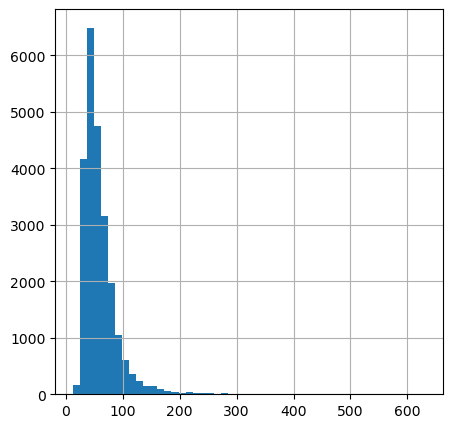

In [108]:
df['total_area'].hist(bins= 50, figsize=(5, 5))

In [109]:
def too_match_area (area):
    if area <= 200:
        return area
    else:
        return area /10
df['total_area']= df['total_area'].apply(too_match_area)  

<Axes: >

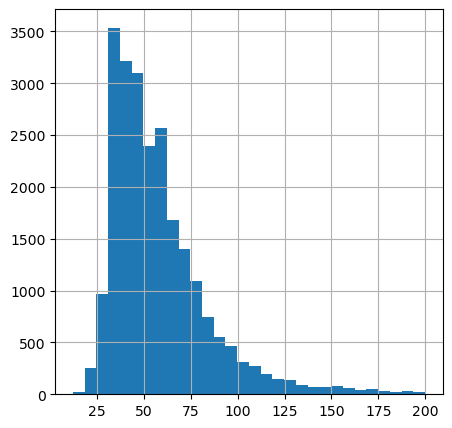

In [110]:
df['total_area'].hist(bins= 30, figsize=(5, 5))

In [111]:
df.query('total_area > 250')['total_area'].count()

0

- По первой гистограмме видно, что значения больше 200 скорее всего были ошибочные и в них был добавлен лишний 0, поэтому исправил их, поделив на 10. Теперь гистограммма больше похоже на нормальную.

### анализ столбца 'living_area'

<Axes: >

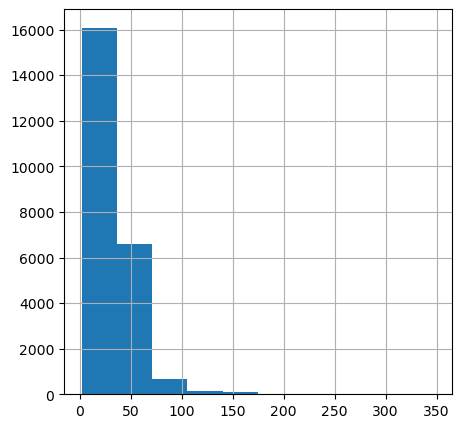

In [112]:
df['living_area'].hist(figsize=(5, 5))

<Axes: >

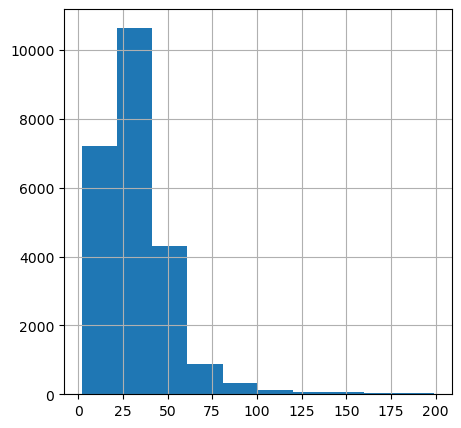

In [114]:
df.update(df[(df['living_area'] >= 200)]['living_area']/10)
df['living_area'].hist(figsize=(5, 5))

<Axes: >

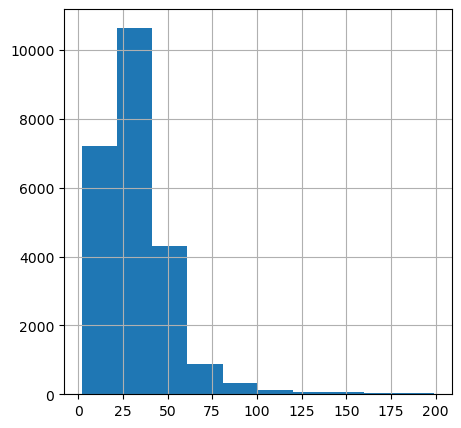

In [115]:
df['living_area'].hist(figsize=(5, 5))

- По первой гистограмме видно, что значения больше 200 скорее всего были ошибочные и в них был добавлен лишний 0, поэтому исправил их, поделив на 10. Теперь гистограммма больше похоже на нормальную.

### анализ столбца 'kitchen_area'

<Axes: >

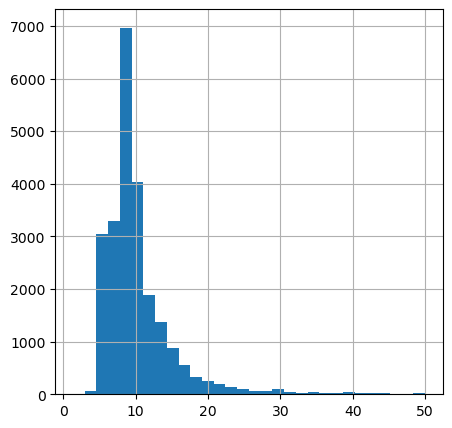

In [116]:
df['kitchen_area'].hist(bins= 30, figsize=(5, 5))

In [117]:
df.query('kitchen_area > 40')['kitchen_area'].count()

85

In [118]:
df.update(df[(df['kitchen_area'] >= 40)]['kitchen_area']/10)

<Axes: >

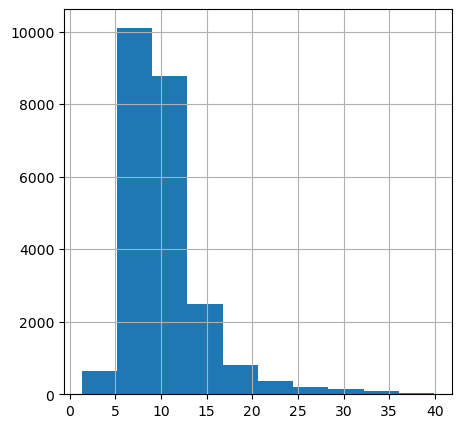

In [119]:
df['kitchen_area'].hist(bins= 10, figsize=(5, 5))

- По первой гистограмме видно, что значения больше 40 скорее всего были ошибочные и в них был добавлен лишний 0, поэтому исправил их, поделив на 10. Теперь гистограммма больше похоже на нормальную.

### анализ столбца 'last_price'

In [120]:
df['last_price'].max()

763000000.0

<Axes: >

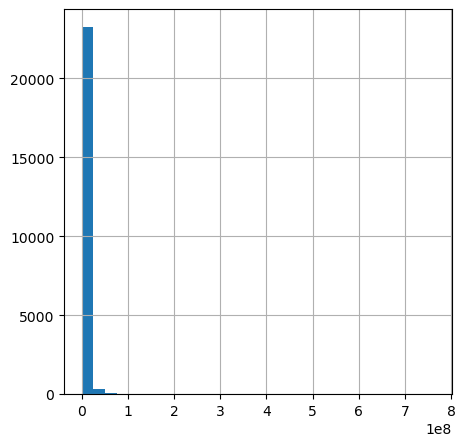

In [121]:
df['last_price'].hist(bins= 30, figsize=(5, 5))

In [122]:
df.update(df[(df['last_price'] >= 30000000)]['last_price']/10)

In [123]:
df.query('last_price > 30000000')['last_price'].count()

3

In [124]:
df = df.query('last_price < 30000000')

<Axes: >

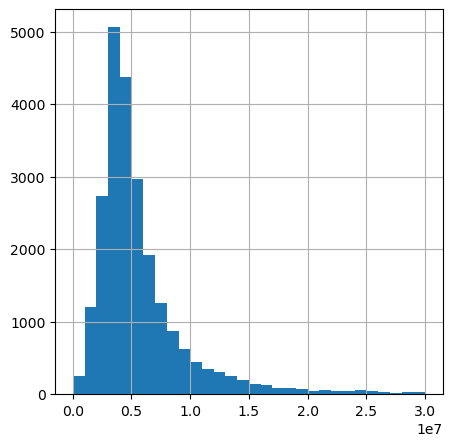

In [125]:
df['last_price'].hist(bins= 30, figsize=(5, 5))

- По первой гистограмме видно, что значения больше 30 000 000 скорее всего были ошибочные и в них был добавлен лишний 0, поэтому исправил их, поделив на 10. Теперь гистограммма больше похоже на нормальную.

### анализ столбца 'rooms'

<Axes: >

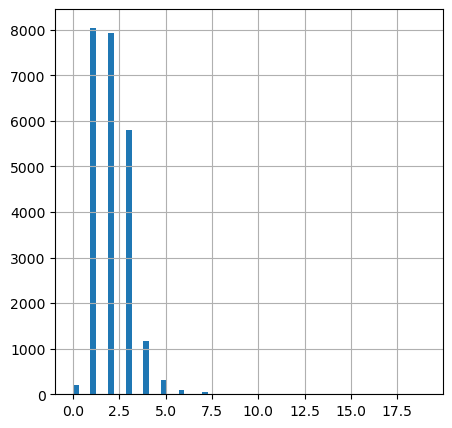

In [126]:
df['rooms'].hist(bins= 60, figsize=(5, 5))

In [127]:
df['rooms'].value_counts()

rooms
1     8046
2     7935
3     5796
4     1172
5      318
0      197
6      103
7       54
8       12
9        8
10       3
11       2
14       2
19       1
16       1
Name: count, dtype: int64

In [128]:
df = df.query('0 < rooms < 9')

<Axes: >

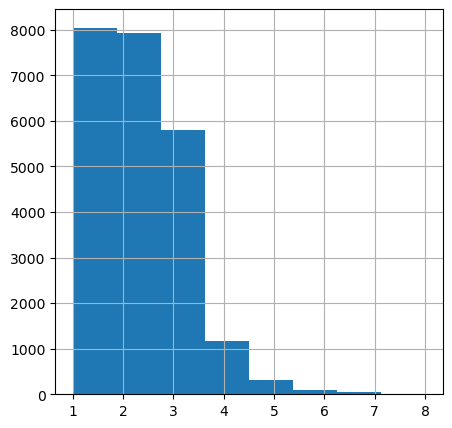

In [129]:
df['rooms'].hist(bins= 8, figsize=(5, 5))

- Убрал квартиры, у которых комнат было слишком много, их мало, поэтому это не повлияет на исследования.

### анализ столбца 'ceiling_height'

<Axes: >

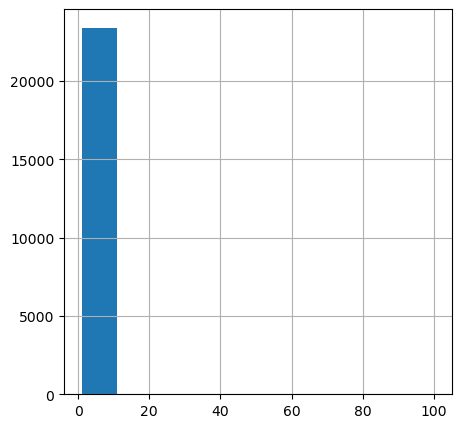

In [130]:
df['ceiling_height'].hist(bins= 10, figsize=(5, 5))

In [131]:
df['ceiling_height'].min()

1.0

In [132]:
df['ceiling_height'].max()

100.0

In [133]:
df.query('ceiling_height >= 4' )['ceiling_height'].value_counts()

ceiling_height
4.00      36
4.20      10
25.00      7
4.50       7
27.00      7
4.10       3
4.40       3
8.00       3
32.00      2
4.45       2
4.70       2
4.19       2
14.00      1
4.14       1
4.25       1
4.15       1
20.00      1
4.65       1
6.00       1
22.60      1
27.50      1
4.90       1
10.30      1
5.30       1
26.00      1
4.30       1
5.50       1
8.30       1
24.00      1
4.37       1
4.80       1
5.60       1
4.06       1
5.00       1
5.20       1
100.00     1
Name: count, dtype: int64

In [134]:
df.update(df[(df['ceiling_height'] >= 10)]['ceiling_height']/10)

In [135]:
df.query('ceiling_height <= 2' )['ceiling_height'].value_counts()

ceiling_height
2.00    12
1.20     1
1.40     1
1.75     1
1.03     1
1.00     1
Name: count, dtype: int64

In [136]:
df = df.query('1.75 < ceiling_height < 8')

<Axes: >

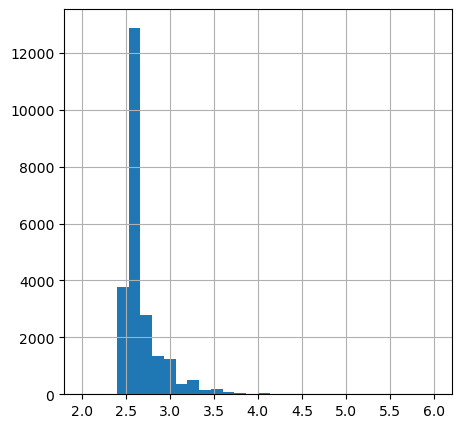

In [137]:
df['ceiling_height'].hist(bins= 30, figsize=(5, 5))

- Значения высоты потолков в 1 м и 100 не реалестичны. Первое я убрал как выброс, второе я поделил на 10, так как был возможно поставлен лишний 0, так же как и в других таких столбцах.

### анализ столбца 'type_of_floors'

<Axes: >

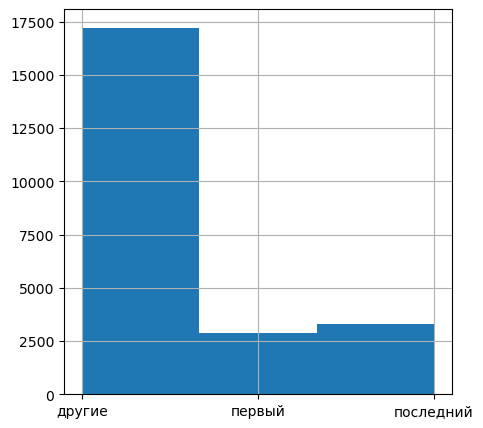

In [138]:
df['type_of_floors'].hist(bins= 3, figsize=(5, 5))

- В гистограмме нет неожиданных значений или выбросов. Распределение этажей в норме.

### анализ столбца 'floors_total'

<Axes: >

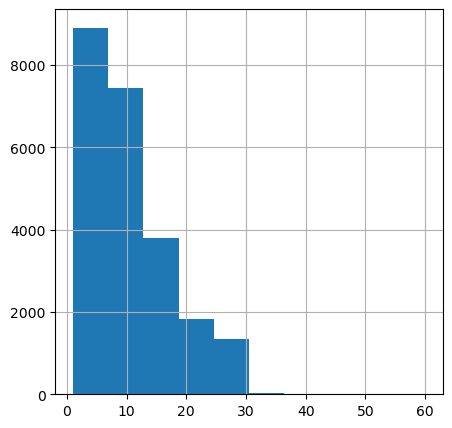

In [139]:
df['floors_total'].hist(bins= 10, figsize=(5, 5))

In [140]:
df.query('floors_total > 35')['floors_total']

397      36.0
2253     60.0
5807     36.0
11079    36.0
16731    52.0
Name: floors_total, dtype: float64

<Axes: >

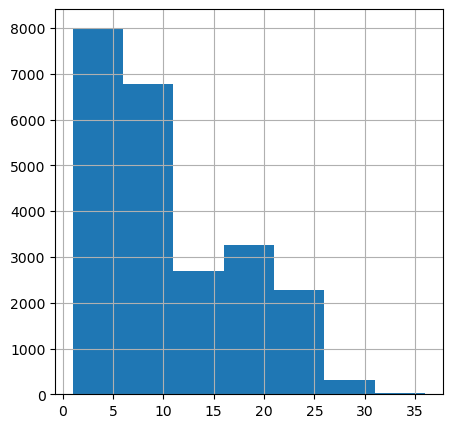

In [141]:
df = df.query('floors_total <= 36')
df['floors_total'].hist(bins= 7, figsize=(5, 5))

- Количество этажей больше 36 сомнительно, и поскольку их немного, я убрал из датафрейма эти выбросы.

### анализ столбца 'city_сenters_nearest'

<Axes: >

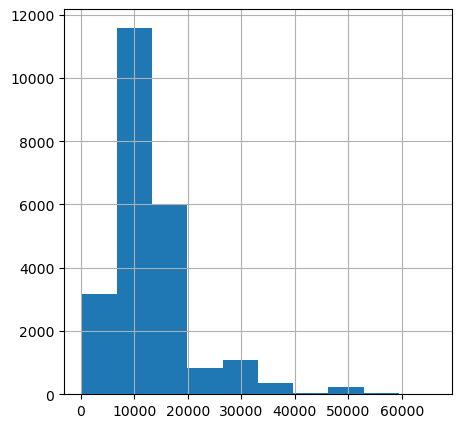

In [142]:
df['city_сenters_nearest'].hist(bins= 10, figsize=(5, 5))

In [143]:
df.query('city_сenters_nearest >= 50000')['city_сenters_nearest'].count()

186

In [144]:
df.query('city_сenters_nearest >= 50000')['locality_name_last_word'].value_counts()

locality_name_last_word
Ломоносов      119
Кронштадт       38
Зеленогорск     24
Молодежное       5
Name: count, dtype: int64

In [145]:
df.query('city_сenters_nearest >= 50000 & locality_name_last_word == "Ломоносов"')['locality_name_last_word'].count()

119

- Я не был уверен в достоверности данных от 50км и поэтому нашёл названия населенных пунктов и узнал из открытого источника настоящее растояние, которое совпало с данными в таблице.

### анализ столбца 'parks_nearest'

<Axes: >

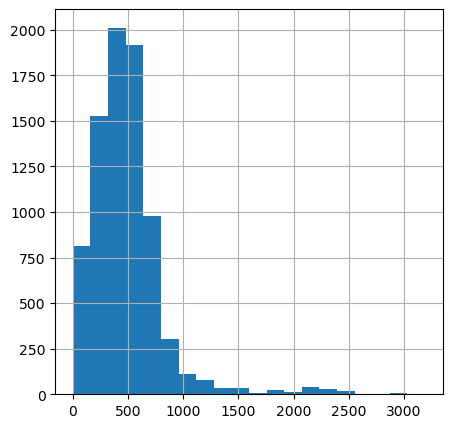

In [146]:
df['parks_nearest'].hist(bins= 20, figsize=(5, 5))

In [147]:
check_df

23699

In [148]:
check_df_final = df.shape[0]

In [149]:
check_df_final

23341

In [150]:
difference_check_df = check_df - check_df_final

In [151]:
percentage = round((difference_check_df / check_df_final) * 100, 2)
print('во время обработки, был убран', percentage,'% от всех данных')

во время обработки, был убран 1.53 % от всех данных


In [152]:
percentage = round((df['days_exposition'].isna().sum() / 23699) * 100, 2)
print('если убрать пропуски колонки days_exposition будет', percentage,'% от всех данных, что будет слишком много, поэтому осатвлю пропуски')

если убрать пропуски колонки days_exposition будет 13.27 % от всех данных, что будет слишком много, поэтому осатвлю пропуски


- после  обработки осталось 98.5% процента, от исходных данных, этого достаточно для иследования.

   

- Данные по гистограмме в пределах ожидаемой нормы.

### Зависимость цены от общей площади

<Axes: xlabel='last_price'>

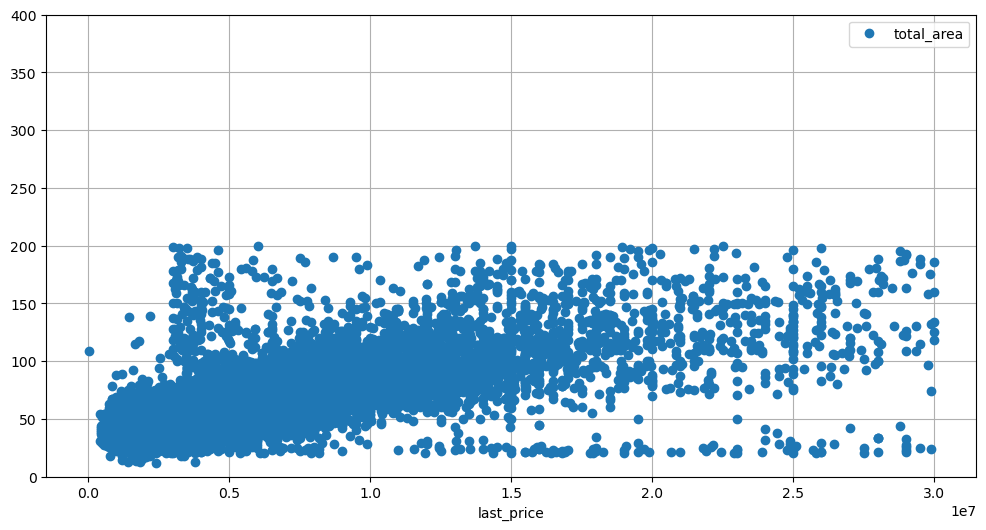

In [153]:
df.plot(
    x='last_price',
    y='total_area',
    ylim=(0, 400),
    style='o',
    grid=True,
    figsize=(12, 6),
) 

- По диаграмме рассеивания видно, что есть растущая зависимость цены от площади квартиры. Значения, которые сильно дешевы по отношению к площади, это, вероятно, большие дачные участки, которые стоят дешевле, чем квартиры. Также значения, которые дорогие даже при маленькой площади квартиры, вероятно, находятся в центре города или в очень дорогом районе города.

### Зависимость цены от жилой площади

<Axes: xlabel='last_price'>

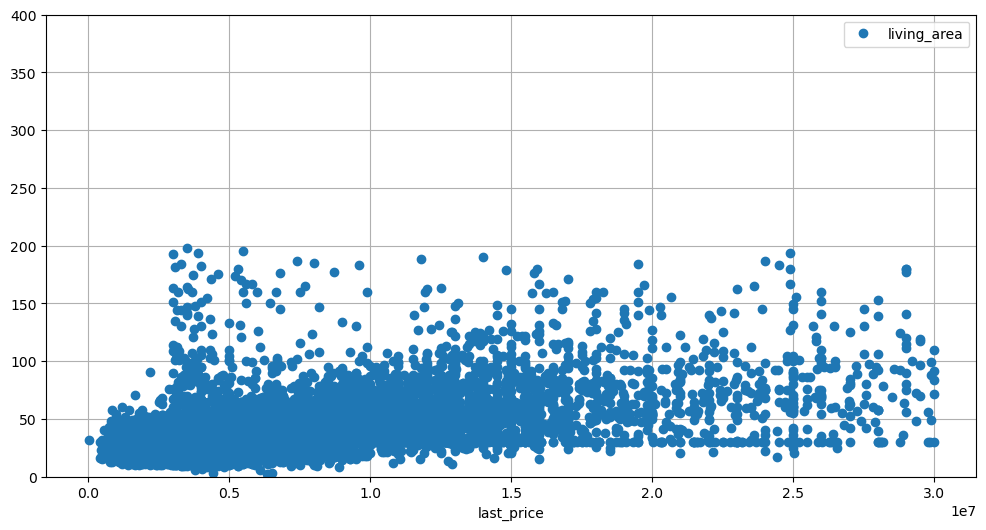

In [154]:
df.plot(
    x='last_price',
    y='living_area',
    ylim=(0, 400),
    style='o',
    grid=True,
    figsize=(12, 6),
) 

- По этой диаграмме видно, что зависимость от жилой площади на цену влияет слабее.

### Зависимость цены от  площади кухни

<Axes: xlabel='last_price'>

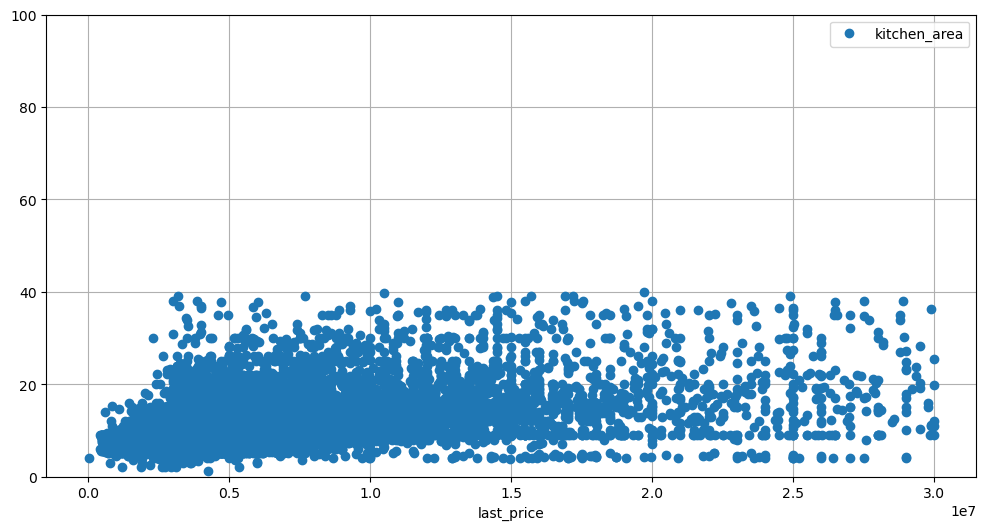

In [155]:
df.plot(
    x='last_price',
    y='kitchen_area',
    ylim=(0, 100),
    style='o',
    grid=True,
    figsize=(12, 6),
) 

- Зависимость от площади кухни почти отсутствует

### Зависимость цены от количества комнат

In [156]:
df.groupby('rooms')['last_price'].median()

rooms
1     3600000.0
2     4750000.0
3     6086113.5
4     8450000.0
5    11000000.0
6    13015000.0
7    15000000.0
8    16300000.0
Name: last_price, dtype: float64

In [157]:
df.groupby('rooms')['last_price'].mean().round()

rooms
1     3811316.0
2     5442729.0
3     7324408.0
4    10081344.0
5    12157820.0
6    13660178.0
7    14760637.0
8    14959167.0
Name: last_price, dtype: float64

<Axes: xlabel='rooms'>

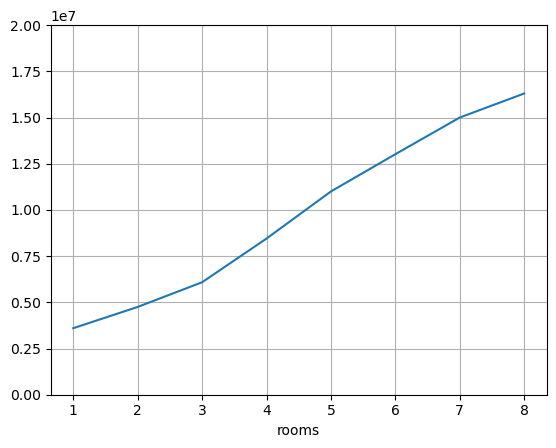

In [158]:
df.groupby('rooms')['last_price'].median().plot(ylim=(0, 20000000), grid= True)

- Видна чёткая зависимость цены от количества комнат: чем больше тем дороже.

### Зависимость цены от типа этажа

In [159]:
df.groupby('type_of_floors')['last_price'].median()

type_of_floors
другие       4800000.0
первый       3900000.0
последний    4290000.0
Name: last_price, dtype: float64

In [160]:
df.groupby('type_of_floors')['last_price'].mean().round()

type_of_floors
другие       5967810.0
первый       4559363.0
последний    5551919.0
Name: last_price, dtype: float64

<Axes: xlabel='type_of_floors'>

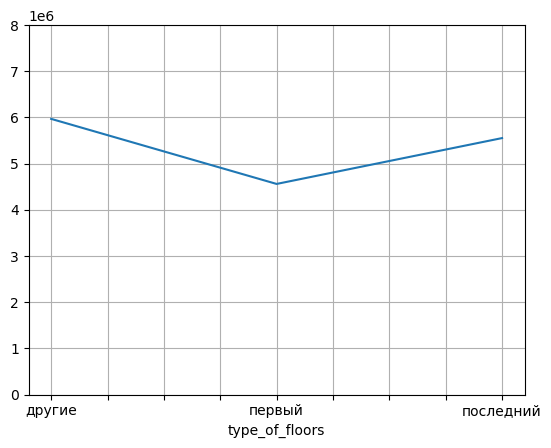

In [161]:
df.groupby('type_of_floors')['last_price'].mean().round().plot(ylim=(0, 8000000),grid= True)

- Квартиры на первом этаже стоят дешевле, вероятно из-за определённых факторов, таких как шум и решётки для защиты квартиры. Также дешевле квартиры на последнем этаже, но не так сильно как на первом. На всех других этажах, стоимость выше.

### Зависимость цены от дня недели

In [162]:
df.groupby('day_of_the_week')['last_price'].median()

day_of_the_week
0    4600000.0
1    4700000.0
2    4670000.0
3    4600000.0
4    4550000.0
5    4500000.0
6    4500000.0
Name: last_price, dtype: float64

In [163]:
df.groupby('day_of_the_week')['last_price'].mean().round()

day_of_the_week
0    5771380.0
1    5747835.0
2    5872648.0
3    5850075.0
4    5667808.0
5    5477100.0
6    5457026.0
Name: last_price, dtype: float64

<Axes: xlabel='day_of_the_week'>

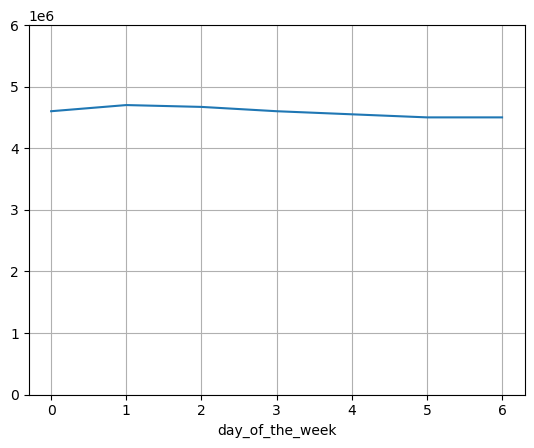

In [164]:
df.groupby('day_of_the_week')['last_price'].median().plot(ylim=(0, 6000000), grid= True)

- От дня недели не зависит стоимость квартиры.

### Зависимость цены от месяца

In [165]:
df.groupby('month_of_publication')['last_price'].mean().round()

month_of_publication
1     5824682.0
2     5711364.0
3     5650149.0
4     5822582.0
5     5659362.0
6     5481614.0
7     5765689.0
8     5677905.0
9     5890325.0
10    5642966.0
11    5839697.0
12    5833418.0
Name: last_price, dtype: float64

In [166]:
df.groupby('month_of_publication')['last_price'].median()

month_of_publication
1     4600000.0
2     4600000.0
3     4600000.0
4     4790000.0
5     4500000.0
6     4390000.0
7     4600000.0
8     4550000.0
9     4700000.0
10    4550000.0
11    4675000.0
12    4665000.0
Name: last_price, dtype: float64

<Axes: xlabel='month_of_publication'>

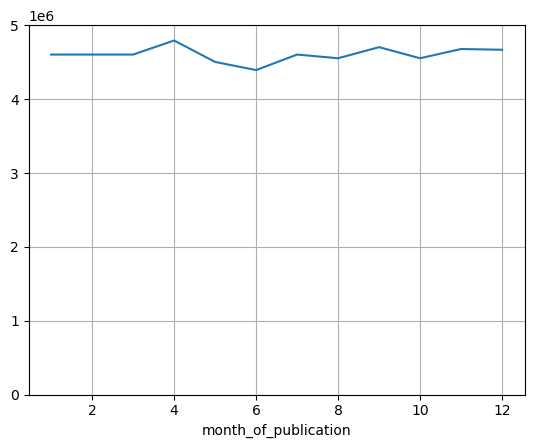

In [167]:
df.groupby('month_of_publication')['last_price'].median().plot(ylim=(0, 5000000),grid= True)

- По графику прослеживается некоторая сезонность. В марте стоимость квартир была выше чем в июне.

### Зависимость цены от года

In [168]:
df.groupby('year_of_publication')['last_price'].mean().round()

year_of_publication
2014    9346544.0
2015    6708813.0
2016    5715041.0
2017    5661179.0
2018    5525102.0
2019    6003662.0
Name: last_price, dtype: float64

In [169]:
df.groupby('year_of_publication')['last_price'].median()

year_of_publication
2014    7182500.0
2015    5200000.0
2016    4500000.0
2017    4500000.0
2018    4550000.0
2019    5000000.0
Name: last_price, dtype: float64

<Axes: xlabel='year_of_publication'>

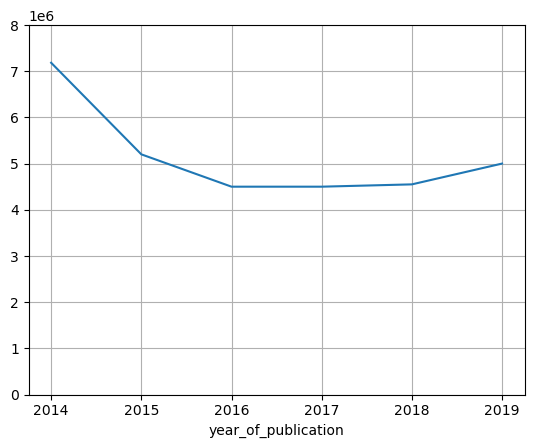

In [170]:
df.groupby('year_of_publication')['last_price'].median().plot(ylim=(0, 8000000),grid= True)

<Axes: xlabel='year_of_publication'>

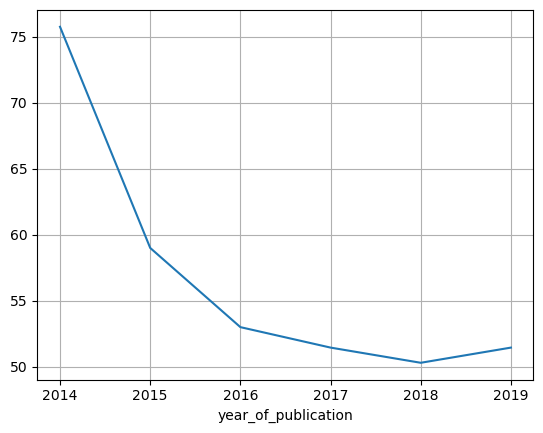

In [171]:
df.groupby('year_of_publication')['total_area'].median().plot(grid= True)

- По графику видно, что с 2014 цена на недвижимость уменьшалась по 2016, затем начался плавный рост цен.
по последней диаграмме видно, что по 2016 год продавались квартиры с невысокой площадью.


### средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [172]:
grouped = df.groupby('locality_name')
counts = grouped.size()

In [173]:
top10 = counts.sort_values(ascending=False).index[:10]

In [174]:
for locality in top10:
    average_price = df[df['locality_name'] == locality]['price_per_square_meter '].mean()
    print(f'{locality: <20}{average_price.round(): >8} р. за квадратный метр')

Санкт-Петербург     114095.0 р. за квадратный метр
поселок Мурино       85030.0 р. за квадратный метр
поселок Шушары       78278.0 р. за квадратный метр
Всеволожск           68618.0 р. за квадратный метр
Пушкин              102900.0 р. за квадратный метр
Колпино              75425.0 р. за квадратный метр
поселок Парголово    90290.0 р. за квадратный метр
Гатчина              68746.0 р. за квадратный метр
деревня Кудрово      92297.0 р. за квадратный метр
Выборг               58142.0 р. за квадратный метр


- Самые дорогой метр в квадрате в Питере и Пушкине, самый дешёвый в Всеволожске, Гатчине и Выборге

### средняя стоимость квартир на разном расстоянии от центра Питера в км.

In [175]:
df_piter = df[df['locality_name'] == "Санкт-Петербург"]

In [176]:
df_piter.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_last_word,first_day_year,price_per_square_meter,day_of_the_week,month_of_publication,year_of_publication,type_of_floors,city_сenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,755.0,NaN,Санкт-Петербург,2019,120370.37,3,3,2019,другие,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,574.0,558.0,Санкт-Петербург,2015,92785.71,3,8,2015,другие,14.0
3,0,6490000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,True,...,234.0,424.0,Санкт-Петербург,2015,408176.10,4,7,2015,другие,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,48.0,121.0,Санкт-Петербург,2018,100000.00,1,6,2018,другие,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,30.0,22,True,...,NaN,NaN,Санкт-Петербург,2019,110544.69,3,4,2019,другие,12.0


In [177]:
grouped_distance = df_piter.groupby('city_сenters_nearest_km')
counts_distance = grouped_distance.size()
average_prices = grouped_distance['last_price'].mean()
for distance, average_price in zip(grouped_distance.groups, average_prices.round()):
    print(f'{distance: <5} км: {average_price: >10} р. за квартиру')

0.0   км:  9136673.0 р. за квартиру
1.0   км: 11460233.0 р. за квартиру
2.0   км: 10630201.0 р. за квартиру
3.0   км:  9588847.0 р. за квартиру
4.0   км: 10122686.0 р. за квартиру
5.0   км: 10630942.0 р. за квартиру
6.0   км:  9323187.0 р. за квартиру
7.0   км:  8796575.0 р. за квартиру
8.0   км:  8702146.0 р. за квартиру
9.0   км:  6749081.0 р. за квартиру
10.0  км:  6336514.0 р. за квартиру
11.0  км:  6068874.0 р. за квартиру
12.0  км:  5823918.0 р. за квартиру
13.0  км:  6210562.0 р. за квартиру
14.0  км:  5602106.0 р. за квартиру
15.0  км:  5775740.0 р. за квартиру
16.0  км:  5365733.0 р. за квартиру
17.0  км:  5278800.0 р. за квартиру
18.0  км:  5099375.0 р. за квартиру
19.0  км:  5081623.0 р. за квартиру
20.0  км:  6097430.0 р. за квартиру
21.0  км:  5519275.0 р. за квартиру
22.0  км:  5415524.0 р. за квартиру
23.0  км:  5042855.0 р. за квартиру
24.0  км:  3890687.0 р. за квартиру
25.0  км:  4052840.0 р. за квартиру
26.0  км:  4014287.0 р. за квартиру
27.0  км:  8300000.0 р. за к

<Axes: xlabel='city_сenters_nearest_km'>

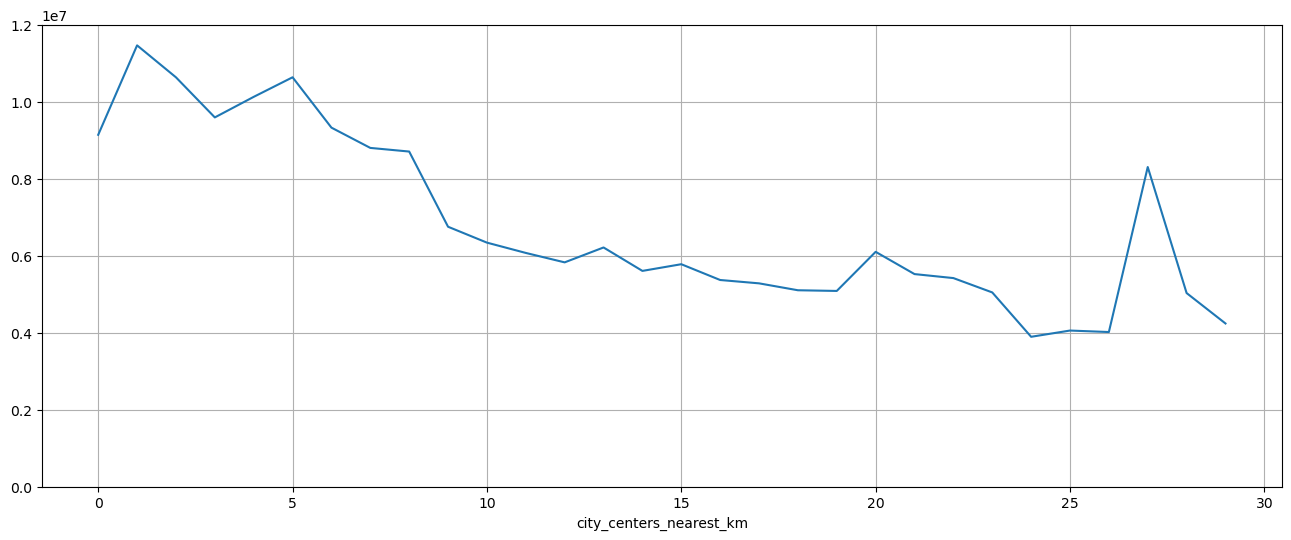

In [178]:
df_piter.groupby('city_сenters_nearest_km')['last_price'].mean().plot(ylim=(0, 12000000),grid= True, figsize=(16, 6))

In [179]:
df_piter.query('city_сenters_nearest_km >= 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_last_word,first_day_year,price_per_square_meter,day_of_the_week,month_of_publication,year_of_publication,type_of_floors,city_сenters_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,True,...,NaN,128.0,Санкт-Петербург,2017,193918.92,1,11,2017,другие,27.0
814,0,7600000.0,111.0,2017-07-26,3,3.00,16.0,63.0,12,True,...,72.0,66.0,Санкт-Петербург,2017,68468.47,2,7,2017,другие,28.0
1111,0,4072000.0,38.0,2015-10-14,1,2.65,5.0,16.0,4,True,...,NaN,285.0,Санкт-Петербург,2015,107157.89,2,10,2015,другие,28.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2.0,16.5,2,True,...,NaN,178.0,Санкт-Петербург,2018,70312.50,1,2,2018,последний,27.0
9572,0,3413000.0,43.0,2015-11-10,1,2.65,5.0,18.0,1,True,...,NaN,258.0,Санкт-Петербург,2015,79372.09,1,11,2015,первый,28.0
10798,10,4850000.0,62.0,2017-05-16,3,2.65,5.0,35.7,1,False,...,NaN,63.0,Санкт-Петербург,2017,78225.81,1,5,2017,первый,29.0
11652,16,4700000.0,51.0,2016-06-07,2,2.60,5.0,30.0,1,True,...,NaN,539.0,Санкт-Петербург,2016,92156.86,1,6,2016,первый,29.0
12160,8,2450000.0,43.0,2018-08-14,1,2.75,5.0,16.0,1,True,...,NaN,8.0,Санкт-Петербург,2018,56976.74,1,8,2018,первый,29.0
13031,16,4200000.0,56.8,2018-07-04,2,3.50,3.0,27.9,1,True,...,NaN,187.0,Санкт-Петербург,2018,73943.66,2,7,2018,первый,29.0
16787,20,4850000.0,85.8,2019-04-22,3,3.60,3.0,49.4,2,True,...,NaN,NaN,Санкт-Петербург,2019,56526.81,0,4,2019,другие,29.0


- На высокое среднее значение 27-го км. влияет 2-комнатная квартира под индексом 748, что гораздо выше, чем другие квартиры на этом расстоянии. 

- По диаграме и расчётам выше, видно что в районе  27-го км. очень сильно завышенна средняя цена за счёт одной квартиры, это может быть как очень престижная квартира, либо недобросовестно установлена цена. Слишком высокая цена за 30 квадртаных метров жилой площади. По остальной диаграмме видно, что чем дальше от центра тем в среднем дешевле квартиры.


## Общий вывод

1. Есть растущая зависимость цены от площади квартиры. Значения, которые сильно дешевы по отношению к площади, — это, вероятно, большие дачные участки, которые стоят дешевле, чем квартиры. Также значения, которые дорогие, даже при маленькой площади квартиры, вероятно, находятся в центре города или в очень дорогом районе города. Чем больше общая площадь квартиры, тем выше цена.
2. Размера жилой площади на цену влияет сильно слабее, но зависимость ещё сохраняется.
3. Размера площади кухни на цену не влияет.
4. Есть сильная растущая зависимость цены от количества комнат в квартире.
5. Квартиры на первом этаже стоят дешевле, вероятно, из-за определённых факторов, таких как шум и решётки для защиты квартиры. Также дешевле квартиры на последнем этаже, но не так сильно, как на первом. На всех других этажах стоимость выше.
6. От дня недели стоимость выставленных квартир не зависит, от месяца прослеживается лёгкая сезонность («В марте стоимость квартир была выше, чем в июне»), а вот с 2014 г. цена на недвижимость уменьшалась по 2016 г., затем начался плавный рост цен.
7. Самый дорогой квадратный метр в Питере и Пушкине, самый дешёвый — в Всеволожске, Гатчине и Выборге.
8. Средняя стоимость квартир от центра Питера в км уменьшается. По графику чётко видно, что чем дальше, тем дешевле. Самые дорогие квартиры в центре. Квартира, которая стоит очень дорого на окраине, неблагонадёжна и не заслуживает доверия.
9. Самая дорогая квартира будет в центре города,с большим количеством комнат и общей площадью, не на первом и не на последнем этаже. А самая дешёвая, однокомнатная, на окраине города и либо на первом, либо на последнем этаже.